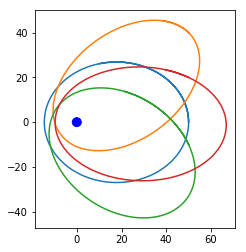

In [49]:
import numpy
import numpy.linalg
import matplotlib.pyplot as plt

G = 50.0  # гравитационная постоянная
collision_distance = 3.0  # всё-таки это не точки
model_delta_t = 0.01
time_to_model = 10

class MaterialPoint:
    """Материальная точка, движущаяся по двумерной плоскости"""
    
    def __init__(self, mass: 'float', position: 'numpy.array', velocity: 'numpy.array'):
        # Аннотации типов по желанию, но могут помочь IDE и компилятору, когда таковые имеются
        self.mass = mass
        self.position = position
        self.velocity = velocity
    
    @staticmethod
    def gravity_dencity(dist: 'float')-> 'float':
        if dist > collision_distance:
            return G / dist ** 2
        else:
            return -G / dist ** 3 # будем считать, что отскакивают точки друг от друга резко, но стараться не допускать этого
    
    def force_induced_by_other(self, other: 'MaterialPoint')-> 'numpy.array':
        delta_p = other.position - self.position
        distance = numpy.linalg.norm(delta_p)  # Евклидова норма (по теореме Пифагора)
        force_direction = delta_p / distance
        # @staticmethod позволяет вызвать статический метод от self, не зная точного типа
        force = force_direction * self.mass * other.mass * self.gravity_dencity(distance)
        return force
    
    def advance(self):
        # print(self.position)
        self.position += self.velocity * model_delta_t

    def apply_force(self, force: 'numpy.array'):
        # print(force)
        self.velocity += force * model_delta_t / self.mass


centrum = MaterialPoint(500.0, numpy.array([0.0, 0.0]), numpy.array([0.0, 0.0]))
points = [MaterialPoint(10.0, numpy.array([50.0, 0.0]), numpy.array([0.0, 15.0])),
        MaterialPoint(10.0, numpy.array([50.0, 40.0]), numpy.array([-7.0, 7.0])),
        MaterialPoint(10.0, numpy.array([50.0, -10.0]), numpy.array([-7.0, 15.0])),
        MaterialPoint(10.0, numpy.array([50.0, 20.0]), numpy.array([-15.0, 7.0]))
       ]

def model_step():
    for i in points:
        i.apply_force(i.force_induced_by_other(centrum))
    for i in points:
        i.advance()

xs = [[] for i in range(len(points))]
ys = [[] for i in range(len(points))]
for stepn in range(int(time_to_model / model_delta_t)):
    for i in range(len(points)):
        xs[i].append(points[i].position[0])
        ys[i].append(points[i].position[1])
    model_step()

c = plt.Circle((0, 0), 2, color='b')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')
ax.add_patch(c)


for i,j in zip(xs,ys):
    plt.plot(i,j)

plt.show()